# Introductory challenge material

<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td align="center"; style="background-color:transparent;"><a href = "https://joliot.cea.fr/drf/joliot/recherche/neurospin"><img src="https://baobablab.github.io/bhb/images/collaborators/cea.jpg" width="35%"></td>
    <td align="center"; style="background-color:transparent; width: 50%;"><a href = "https://dataia.eu/"><img src="https://github.com/ramp-kits/brain_anatomy_schizophrenia/raw/main/DATAIA-h.png" width="80%"></a></td>
  </tr>
</table> 
</div>

<center><h1>Predict schizophrenia using brain anatomy</h1></center>


<center><i>Edouard Duchesnay, Antoine Grigis, Benoît Dufumier (Université Paris-Saclay, CEA, NeuroSpin), François Caud, Alexandre Gramfort (Université Paris-Saclay, DATAIA) </i></center>

Predict schizophrenia from brain grey matter (GM). schizophrenia is associated with diffuse and complex pattern of brain atrophy. We will try to learn a predictor of the clinical status (patient with schizophrenia vs. healthy control) using GM measurements on the brain participants.


## Dataset

There are 410 samples in the training set and 103 samples in the test set.


### Input data

Voxel-based_morphometry [VBM](https://en.wikipedia.org/wiki/Voxel-based_morphometry)
using [cat12](http://www.neuro.uni-jena.de/cat/) software which provides:

- Regions Of Interest (`rois`) of Grey Matter (GM) scaled for the Total
  Intracranial Volume (TIV): `[train|test]_rois.csv` 284 features.

- VBM GM 3D maps or images (`vbm3d`) of [voxels](https://en.wikipedia.org/wiki/Voxel) in the
  [MNI](https://en.wikipedia.org/wiki/Talairach_coordinates) space:
  `[train|test]_vbm.npz` contains 3D images of shapes (121, 145, 121).
  This npz contains the 3D mask and the affine transformation to MNI
  referential. Masking the brain provide *flat* 331 695 input features (voxels)
  for each participant.

By default `problem.get_[train|test]_data()` return the concatenation of 284 ROIs of
Grey Matter (GM) features with 331 695 features (voxels) within a brain mask.
Those two blocks are higly redundant.
To select only on ROIs (`rois`) features do:

```
X[:, :284]
```

To select only on (`vbm`) (voxel with the brain) features do:

```
X[:, 284:]
```

### Target

The target can be found in `[test|train]_participants.csv` files, selecting the
`age` column for regression problem.

## Evaluation metrics

[sklearn metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

The main Evaluation metrics is the Root-mean-square deviation
[RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation). We will also
look at the R-squared
[R2](https://en.wikipedia.org/wiki/Coefficient_of_determination).


## Links


- [RAMP-workflow’s documentation](https://paris-saclay-cds.github.io/ramp-workflow/)
- [RAMP-workflow’s github](https://github.com/paris-saclay-cds/ramp-workflow)
- [RAMP Kits](https://github.com/ramp-kits)

## Installation

This starting kit requires Python and the following dependencies:

* `numpy`
* `scipy`
* `pandas`
* `scikit-learn`
* `matplolib`
* `seaborn`
* `jupyter`
* `ramp-workflow`

Therefore, we advise you to install [Anaconda
distribution](https://www.anaconda.com/download/) which include almost all
dependencies.

Only `nilearn` and `ramp-workflow` are not included by default in the Anaconda
distribution. They will be installed from the execution of the notebook.

To run a submission and the notebook you will need the dependencies listed in requirements.txt.
You can install the dependencies with the following command-line:

```
pip install -U -r requirements.txt
```

If you are using conda, we provide an environment.yml file for similar usage.

```
conda env create -f environment.yml
```

Then, you can activate the environment using:

```
conda activate brain-anatomy-schizophrenia
```

And desactivate using

```
conda deactivate
```

## Getting started

1. Download the data locally:

```
python download_data.py
```

2. Execute the jupyter notebook, from the root directory using:

```
jupyter notebook brain_anatomy_schizophrenia_starting_kit.ipynb
```

Tune your model using the starting_kit

3. Submission (Run locally)

The submissions need to be located in the `submissions` folder.
For instance for `starting_kit`, it should be located in
`submissions/starting_kit`.

Copy everything required to build your estimator in a submission file:
`submissions/starting_kit/estimator.py`.
This file must contain a function `get_estimator()`.

Run locally:

```
ramp-test --submission starting_kit
```

4. Submission on RAMP:

[Using RAMP starting-kits](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html)

## Descriptive statistics

         age                                                    
       count       mean        std   min   25%   50%   75%   max
set                                                             
test   103.0  33.466019  12.809935  14.0  23.5  31.0  41.0  66.0
train  410.0  33.068293  12.562225  15.0  22.0  29.0  43.0  65.0
           age
set   sex     
test  0.0   65
      1.0   38
train 0.0  257
      1.0  153


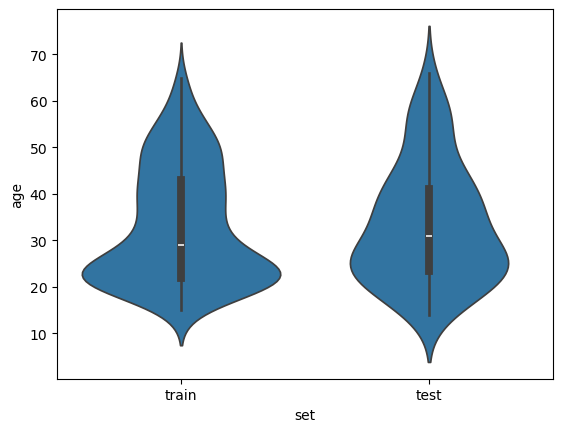

In [26]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

participants_train = pd.read_csv(os.path.join("data", "train_participants.csv" ))
participants_train["set"] = 'train'
participants_test = pd.read_csv(os.path.join("data", "test_participants.csv" ))
participants_test["set"] = 'test'
participants = pd.concat([participants_train, participants_test])

sns.violinplot(x="set", y="age", data=participants)
print(participants[["age", "set"]].groupby("set").describe())
print(participants[["set", "sex", "age"]].groupby(["set", "sex"]).count())

## Unsupervized analysis: Explore main sources of variabilities

Load ROIs data, `train_rois.csv` provides:

- Global volumes of "tissues": CerrebroSpinal Fluid (`CSF_Vol`), Grey (`GM_Vol`) and White Matter (`WM_Vol`) volume of participants.
- ROIs are starting at column `l3thVen_GM_Vol`. Note that `rois_train.loc[:, 'l3thVen_GM_Vol':]` matches `problem.get_train_data()[:, :284]`.

In [27]:
rois_train = pd.read_csv(os.path.join("data", "train_rois.csv" )).loc[:, 'l3thVen_GM_Vol':]
rois_test = pd.read_csv(os.path.join("data", "test_rois.csv" )).loc[:, 'l3thVen_GM_Vol':]
rois = pd.concat([rois_train, rois_test])

### PCA on ROIs: explore global effect of age

                 sum_sq     df          F        PR(>F)
diagnosis   2606.207928    1.0  29.245287  9.808873e-08
Residual   45538.013350  511.0        NaN           NaN
                 sum_sq     df          F    PR(>F)
diagnosis    791.094363    1.0  10.876419  0.001042
Residual   37167.493121  511.0        NaN       NaN


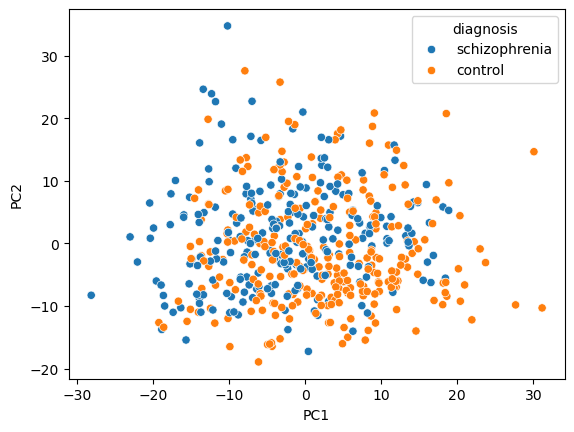

In [28]:
from sklearn.decomposition import PCA
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

PCs = PCA(n_components=2).fit_transform(rois)
participants['PC1'], participants['PC2']  = PCs[:, 0], PCs[:, 1]

sns.scatterplot (x="PC1", y="PC2", hue="diagnosis",  data=participants)
oneway = smf.ols('PC1 ~ diagnosis', participants).fit()
print(sm.stats.anova_lm(oneway, typ=2))
oneway = smf.ols('PC2 ~ diagnosis', participants).fit()
print(sm.stats.anova_lm(oneway, typ=2))

Diagnosis is associated with two first components, we expect to be abble to predict the diagnosis

## Machine learning


Import and read data

In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.base import BaseEstimator
import sklearn.preprocessing as preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
import sklearn.metrics as metrics
import problem

from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

Load concatenated data: 284 features from ROIs and 331,695 features from VBM.

In [30]:
X_train, y_train = problem.get_train_data()
X_test, y_test = problem.get_test_data()

assert X_train.shape[1] == 284 + 331695

## Feature extractor of ROIs or voxels within the brain (VBM)

Selecting only rois or vbm images:

This can be achieved by a `ROIsFeatureExtractor` or `VBMFeatureExtractor` 

In [31]:
class ROIsFeatureExtractor(BaseEstimator, TransformerMixin):
    """Select only the 284 ROIs features:"""
    def fit(self, X, y):
        return self

    def transform(self, X):
        return X[:, :284]

class VBMFeatureExtractor(BaseEstimator, TransformerMixin):
    """Select only the 284 ROIs features:"""
    def fit(self, X, y):
        return self

    def transform(self, X):
        return X[:, 284:]


fe = ROIsFeatureExtractor()
print(fe.transform(X_train).shape)

fe = VBMFeatureExtractor()
print(fe.transform(X_train).shape)

(410, 284)
(410, 331695)


## Design of predictors and their evaluation using CV and test set

The framework is evaluated with a cross-validation approach. The metrics used are the ROC-AUC (auc) and the balanced Accuracy (bacc).

First we propose a simple classification predictor based on ROIs features only:

In [32]:
cv = problem.get_cv(X_train, y_train)

estimator = make_pipeline(
    ROIsFeatureExtractor(),
    MLPClassifier(random_state=1, hidden_layer_sizes=(200, 150, 100, 50, 25, )))
    
cv_results = cross_validate(estimator, X_train, y_train, scoring=['balanced_accuracy', 'roc_auc'], cv=cv,
                         verbose=1, return_train_score=True, n_jobs=5)

print("# 5CV")
print('bACC=%.2f' % cv_results['test_balanced_accuracy'].mean(),
      'ROC-AUC=%.2f' % cv_results['test_roc_auc'].mean())


# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
score_pred_test = estimator.predict_proba(X_test)[:, 1]

bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)
print("# Test")
print('bACC=%.2f' % bacc_test,
      'ROC-AUC=%.2f' % auc_test)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    3.1s remaining:    4.6s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    3.4s finished


# 5CV
bACC=0.71 ROC-AUC=0.77
# Test
bACC=0.63 ROC-AUC=0.74


Then we test a simple classification predictor based on large VBM features, using `RandomForestClassifier` that will be faster on high dimensionnal VBM data.

In [33]:
cv = problem.get_cv(X_train, y_train)

estimator = make_pipeline(
    VBMFeatureExtractor(),
    RandomForestClassifier(random_state=1))
    
cv_results = cross_validate(estimator, X_train, y_train, scoring=['balanced_accuracy', 'roc_auc'], cv=cv,
                         verbose=1, return_train_score=True, n_jobs=5)

print("# 5CV")
print('bACC=%.2f' % cv_results['test_balanced_accuracy'].mean(),
      'ROC-AUC=%.2f' % cv_results['test_roc_auc'].mean())

# Refit on all train
estimator.fit(X_train, y_train)
# Apply on test
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
score_pred_test = estimator.predict_proba(X_test)[:, 1]

bacc_test = metrics.balanced_accuracy_score(y_test, y_pred_test)
auc_test = metrics.roc_auc_score(y_test, score_pred_test)
print("# Test")
print('bACC=%.2f' % bacc_test,
      'ROC-AUC=%.2f' % auc_test)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    6.4s remaining:    9.6s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    6.6s finished


# 5CV
bACC=0.70 ROC-AUC=0.76
# Test
bACC=0.63 ROC-AUC=0.70


## Test submission locally

The submissions need to be located in the submissions folder. For instance for `starting_kit`, it should be located in `submissions/submissions/starting_kit`.

Copy everything required (the cell bellow) to build your estimator in a submission file: `submissions/submissions/starting_kit/estimator.py`. This file must contain a function `get_estimator()`:

In [34]:
import numpy as np

from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline


class ROIsFeatureExtractor(BaseEstimator, TransformerMixin):
    """Select only the 284 ROIs features:"""
    def fit(self, X, y):
        return self

    def transform(self, X):
        return X[:, :284]


def get_estimator():
    """Build your estimator here."""
    estimator = make_pipeline(
        ROIsFeatureExtractor(),
        MLPClassifier(random_state=1, hidden_layer_sizes=(200, 150, 100, 50, 25, )))

    return estimator

Run locally:
    
```
ramp-test --submission starting_kit
```

## Submission on RAMP:


Follow the instructions: [Submitting to a ramp event](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html#submitting-to-a-ramp-event)

The event is [Predict schizophrenia from brain grey matter (classification)](https://ramp.studio/problems/brain_anatomy_schizophrenia)

# COMP0189 - Coursework 2 - Machine learning prediction of patients with schizophrenia from anatomical brain imaging

Please note we assume the data and supporting functions provided by the challenge have been run in the section above.

In [35]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random
import numpy as np
from sklearn.model_selection import GroupKFold
from sklearn.metrics import roc_auc_score, accuracy_score
import timeit


## Additional EDA

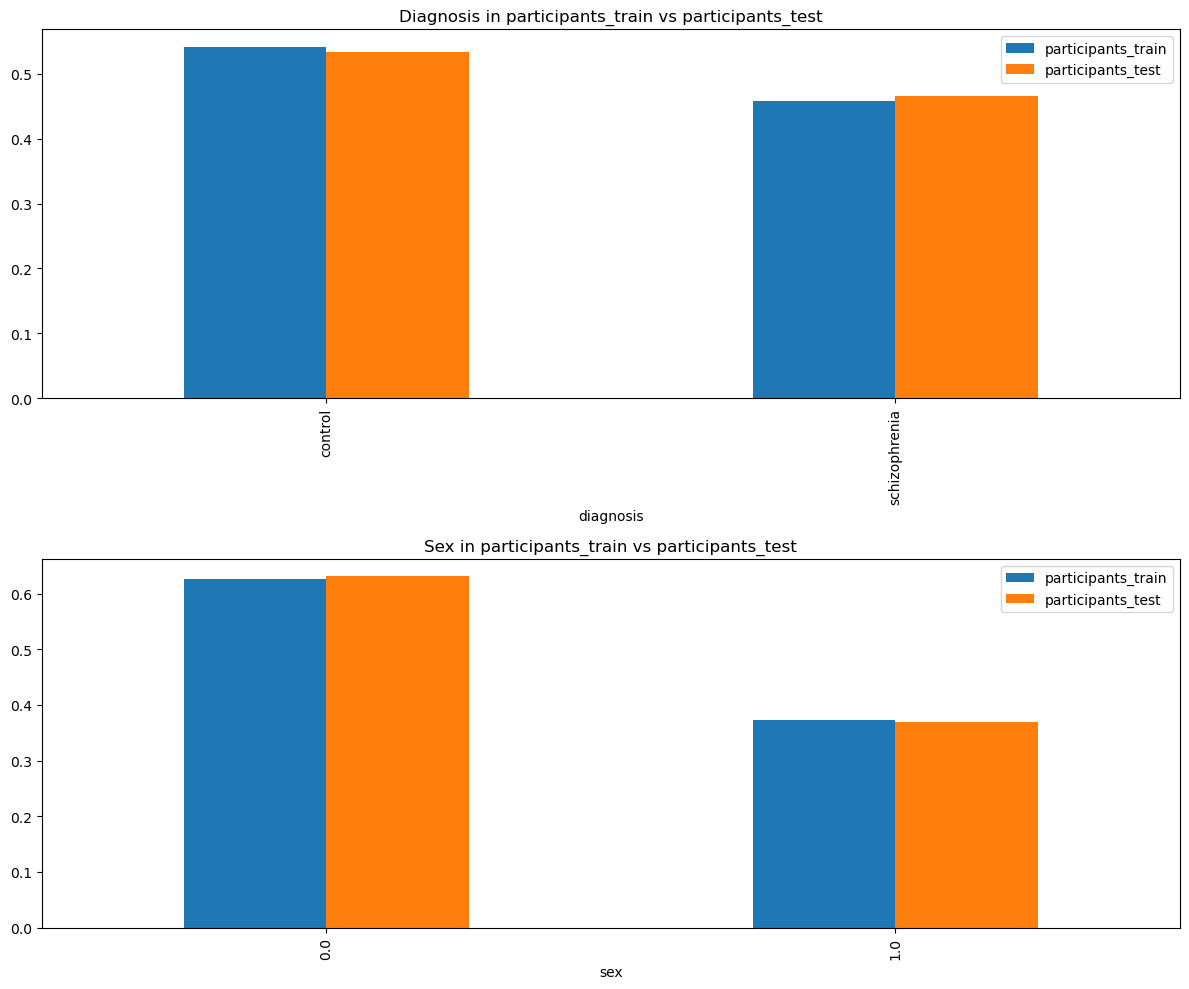

In [36]:
# Create a dataframe with proportions for each category in 'diagnosis' and 'sex'
diagnosis_proportions = pd.DataFrame({
    'participants_train': participants_train['diagnosis'].value_counts() / len(participants_train),
    'participants_test': participants_test['diagnosis'].value_counts() / len(participants_test)
})

sex_proportions = pd.DataFrame({
    'participants_train': participants_train['sex'].value_counts() / len(participants_train),
    'participants_test': participants_test['sex'].value_counts() / len(participants_test)
})

# Create grouped bar charts
fig, axs = plt.subplots(2)

diagnosis_proportions.plot(kind='bar', ax=axs[0], figsize=(12, 10))
axs[0].set_title('Diagnosis in participants_train vs participants_test')

sex_proportions.plot(kind='bar', ax=axs[1])
axs[1].set_title('Sex in participants_train vs participants_test')

plt.tight_layout()
plt.show()

## Functions and setup

In [37]:
# Set the maximum column width to 100 characters
pd.set_option('display.max_colwidth', 500)

In [38]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(21)

In [39]:
# Function to run random search

def run_random_search(models, cv, X_train, y_train, param_distributions, high_dimensionality, groups=None):
    random_search_objects = {}
    
    # Define multiple scoring metrics
    scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
    
    for model_name in models:
        # Choose the feature extractor based on the high_dimensionality flag
        if high_dimensionality:
            fe = VBMFeatureExtractor()
        else:
            fe = ROIsFeatureExtractor()
        
        # Create a pipeline that includes the feature extraction and the model
        pipeline = make_pipeline(fe, models[model_name])
        
        random_search = RandomizedSearchCV(
            pipeline,
            param_distributions=param_distributions[model_name],
            cv=cv, 
            scoring=scoring,
            refit='AUC',
            n_jobs=6,
            n_iter=10)
        if groups:
            random_search.fit(X_train, y_train, groups=groups)
        else:
            random_search.fit(X_train, y_train) 
        random_search_objects[model_name] = random_search
    return random_search_objects

In [40]:
# Function to extract the results from random search

def create_results_df(random_search_objects):
    # Initialize a list to store the results
    results = []

    # Loop over each model
    for model_name, random_search in random_search_objects.items():
        # Get the results of the cross-validation
        cv_results = random_search.cv_results_
        
        # Get the best parameters
        best_params = random_search.best_params_
        
        # Store the results in a dictionary
        result = {
            'Model': model_name,
            'Best Hyperparameters': best_params,
            'Best Score': random_search.best_score_,
            'Mean Test AUC': cv_results['mean_test_AUC'].max(),
            'Std Test AUC': cv_results['std_test_AUC'][cv_results['rank_test_AUC'].argmin()],
            'Mean Test Accuracy': cv_results['mean_test_Accuracy'].max(),
            'Std Test Accuracy': cv_results['std_test_Accuracy'][cv_results['rank_test_Accuracy'].argmin()],
            'Mean Fit Time': cv_results['mean_fit_time'][cv_results['rank_test_AUC'].argmin()],
            'Mean Score Time': cv_results['mean_score_time'][cv_results['rank_test_AUC'].argmin()],
        }
        
        # Append the result to the list
        results.append(result)

    # Create a DataFrame from the results
    df = pd.DataFrame(results)
    
    return df

In [41]:
# Function to plot violinplots from the results

def plot_cv_results(random_search_objects):
    # Extract the mean test scores from the cv_results_ attribute of each random search
    cv_scores_auc = {model: rs.cv_results_['mean_test_AUC'] for model, rs in random_search_objects.items()}
    cv_scores_accuracy = {model: rs.cv_results_['mean_test_Accuracy'] for model, rs in random_search_objects.items()}

    # Convert the dictionaries to DataFrames
    df_auc = pd.DataFrame.from_dict(cv_scores_auc, orient='index').transpose()
    df_accuracy = pd.DataFrame.from_dict(cv_scores_accuracy, orient='index').transpose()

    # Create violin plots of the scores
    for df, score in [(df_auc, 'AUC'), (df_accuracy, 'Accuracy')]:
        sns.violinplot(data=df, palette="muted")

        # Set the title and labels
        plt.title(f'Distribution of {score} Scores from Random Search CV')
        plt.xlabel('Model')
        plt.ylabel(f'{score} Score')

        # Show the plot
        plt.show()

## Setup models and hyperparameter distributions

In [42]:
# Define models and parameters

models_dict = {
    'LogisticRegression': LogisticRegression(penalty='elasticnet', solver='saga'),
    'LGBM': LGBMClassifier(),
    'SVM_RBF': SVC(kernel='rbf')
}

param_distributions = {
    'LogisticRegression': {
        'logisticregression__C': np.logspace(-2, 2, 5),  
        'logisticregression__fit_intercept': [True, False],
        'logisticregression__l1_ratio': np.linspace(0, 0.1, 5),  
        'logisticregression__max_iter': [1000, 5000, 10000]  
    },
    'LGBM': {
        'lgbmclassifier__num_leaves': list(range(15, 33, 5)),
        'lgbmclassifier__max_depth': list(range(5, 11, 2)),
        'lgbmclassifier__learning_rate': np.logspace(-2, 0, 3),
        'lgbmclassifier__n_estimators': list(range(200, 1101, 200)),
        'lgbmclassifier__min_data_in_leaf': list(range(20, 101, 20)),
        'lgbmclassifier__max_bin': list(range(200, 256, 10)),
        'lgbmclassifier__feature_fraction': np.linspace(0.6, 1.0, 5),
        'lgbmclassifier__bagging_fraction': np.linspace(0.7, 1.0, 4),
        'lgbmclassifier__bagging_freq': list(range(10, 51, 20)),
        'lgbmclassifier__force_col_wise': [True, False]
    },
    'SVM_RBF': {
        'svc__C': np.logspace(-1, 2, 4),  
        'svc__gamma': np.logspace(-5, -1, 5)  
    }
}


## Run cross-validation and visualise results

### K-fold cross validation pipeline

/Users/angelinamagal/miniconda3/envs/brain-anatomy-schizophrenia/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/angelinamagal/miniconda3/envs/brain-anatomy-schizophrenia/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/angelinamagal/miniconda3/envs/brain-anatomy-schizophrenia/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/angelinamagal/miniconda3/envs/brain-anatomy-schizophrenia/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/angelinamagal/miniconda3/envs/brain-anatomy-schizophrenia/lib/python3.12/site

[LightGBM] [Warning] bagging_freq is set=50, subsample_freq=0 will be ignored. Current value: bagging_freq=50
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_freq is set=50, subsample_freq=0 will be ignored. Current value: bagging_freq=50
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Info] Number of positive: 150, number of n

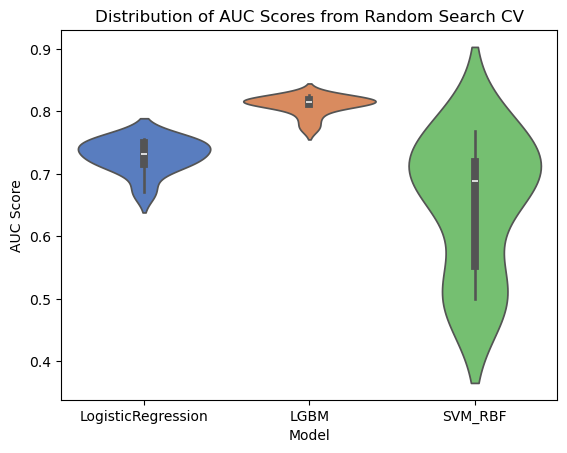

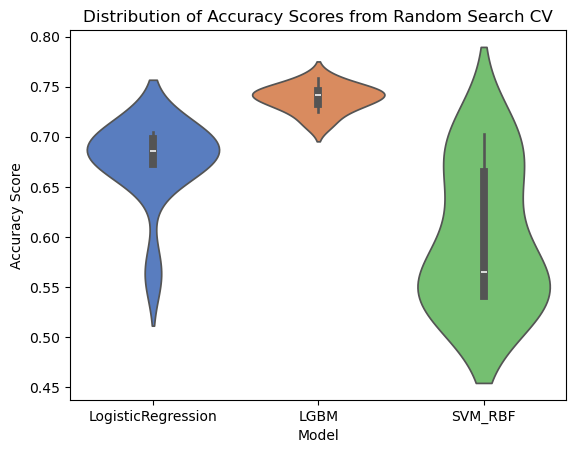

,Model,Best Hyperparameters,Best Score,Mean Test AUC,Std Test AUC,Mean Test Accuracy,Std Test Accuracy,Mean Fit Time,Mean Score Time
0,LogisticRegression,"{'logisticregression__max_iter': 2000, 'logisticregression__l1_ratio': 0.05555555555555556, 'logisticregression__fit_intercept': True, 'logisticregression__C': 0.01}",0.755896,0.755896,0.034936,0.704878,0.038099,0.704558,0.001579
1,LGBM,"{'lgbmclassifier__num_leaves': 20, 'lgbmclassifier__n_estimators': 900, 'lgbmclassifier__min_data_in_leaf': 60, 'lgbmclassifier__max_depth': 6, 'lgbmclassifier__max_bin': 200, 'lgbmclassifier__learning_rate': 0.01, 'lgbmclassifier__force_col_wise': True, 'lgbmclassifier__feature_fraction': 0.9, 'lgbmclassifier__bagging_freq': 20, 'lgbmclassifier__bagging_fraction': 1.0}",0.825476,0.825476,0.029975,0.758537,0.034836,1.007003,0.002636
2,SVM_RBF,"{'svc__gamma': 0.0001, 'svc__C': 10.0}",0.768479,0.768479,0.023251,0.702439,0.053769,0.513143,0.007068


In [43]:
# Run with k-fold validation, no stratification
kf = KFold(n_splits=5, shuffle=True)
# Low dimensional version
rs_lowD_objects = run_random_search(models_dict, kf, X_train, y_train, param_distributions, False)
rs_lowD_results = create_results_df(rs_lowD_objects)
plot_cv_results(rs_lowD_objects)
rs_lowD_results

In [45]:
# High dimensional version
rs_highD_objects = run_random_search(models_dict, kf, X_train, y_train, param_distributions, True)
rs_highD_results = create_results_df(rs_highD_objects)
plot_cv_results(rs_highD_objects)
rs_highD_results

/Users/angelinamagal/miniconda3/envs/brain-anatomy-schizophrenia/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/angelinamagal/miniconda3/envs/brain-anatomy-schizophrenia/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/angelinamagal/miniconda3/envs/brain-anatomy-schizophrenia/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/angelinamagal/miniconda3/envs/brain-anatomy-schizophrenia/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/angelinamagal/miniconda3/envs/brain-anatomy-schizophrenia/lib/python3.12/site

### K-fold cross validation pipeline with gender groups

In [ ]:
# Run with k-fold validation, with groups

# Create a GroupKFold object
gkf = GroupKFold(n_splits=5)  

grs_lowD_objects = run_random_search(models_dict, gkf, X_train, y_train, param_distributions, high_dimensionality=False, groups='sex')
grs_lowD_results = create_results_df(grs_lowD_objects)
plot_cv_results(grs_lowD_objects)
grs_lowD_results

In [ ]:
grs_highD_objects = run_random_search(models_dict, gkf, X_train, y_train, param_distributions, high_dimensionality=True, groups='sex')
grs_highD_results = create_results_df(grs_highD_objects)
plot_cv_results(grs_highD_objects)
grs_highD_results

## Test best-performing models and visualise results

In [ ]:
def test_best_models(rs_objects, X_test, y_test, high_dimensionality):
    results = []

    for name, rs in rs_objects.items():
        # Choose the feature extractor based on the high_dimensionality flag
        if high_dimensionality:
            fe = VBMFeatureExtractor()
        else:
            fe = ROIsFeatureExtractor()

        # Create a pipeline that includes the feature extraction and the model
        best_model = make_pipeline(fe, rs.best_estimator_)

        # Measure fit time
        start_time = timeit.default_timer()
        best_model.fit(X_test, y_test)
        fit_time = timeit.default_timer() - start_time

        # Predict on the test set and measure score time
        start_time = timeit.default_timer()
        y_pred = best_model.predict(X_test)
        score_time = timeit.default_timer() - start_time

        # Calculate the accuracy and ROC AUC of the model
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)

        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'ROC AUC': roc_auc,
            'Fit Time': fit_time,
            'Score Time': score_time
        })

    results_df = pd.DataFrame(results)
    return results_df


In [ ]:
def visualize_test_results(df):
    metrics = ['Accuracy', 'ROC AUC', 'Fit Time', 'Score Time']
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

    for ax, metric in zip(axs.flatten(), metrics):
        df.sort_values(by=metric, ascending=False).plot(x='Model', y=metric, kind='bar', ax=ax, legend=False)
        ax.set_ylabel(metric)
        ax.set_xlabel('')

    plt.tight_layout()
    plt.show()

### Test best-performing models from k-fold cross validation

In [ ]:
# Test the best models for rs_highD_objects
test_highD_results = test_best_models(rs_highD_objects, X_test, y_test, high_dimensionality=True)
# Visualize the results
visualize_test_results(test_highD_results)
# Print the dataframe
test_highD_results


In [ ]:
# Test the best models for rs_lowD_objects
test_lowD_results = test_best_models(rs_lowD_objects, X_test, y_test, high_dimensionality=False)
# Visualize the results
visualize_test_results(test_lowD_results)
# Print the dataframe
test_lowD_results

### Test best-performing models from group k-fold cross validation

In [ ]:
# Test the best models for grs_lowD_objects
test_lowD_results = test_best_models(grs_lowD_objects, X_test, y_test, high_dimensionality=False)

# Visualize the results
visualize_test_results(test_lowD_results)
test_lowD_results

In [ ]:
# Test the best models for grs_highD_objects
test_highD_results = test_best_models(grs_highD_objects, X_test, y_test, high_dimensionality=True)
# Visualize the results
visualize_test_results(test_highD_results)
test_highD_results

